<a href="https://colab.research.google.com/github/Ashishpathak78/ML_-Practice/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Algorithms

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch, DBSCAN, SpectralClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.spatial import distance
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster

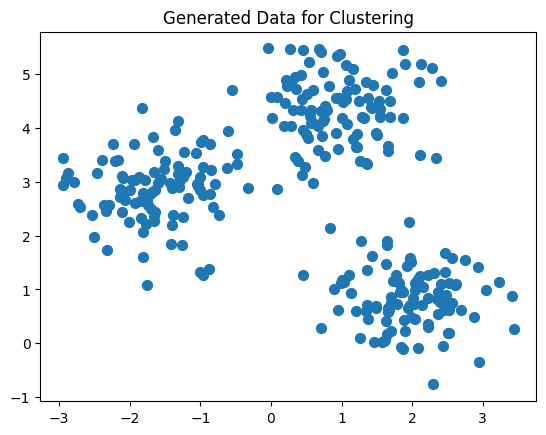

In [ ]:
# Generate sample data
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('Generated Data for Clustering')
plt.show()

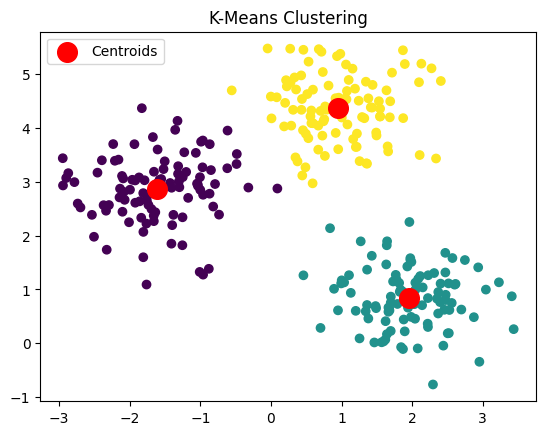

In [ ]:
# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', label='Centroids')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [ ]:
# Distance Metrics
a, b = [1, 2, 3], [4, 6, 8]
print('Euclidean:', distance.euclidean(a, b))
print('Manhattan:', distance.cityblock(a, b))
print('Cosine Similarity:', 1 - distance.cosine(a, b))
print('Minkowski (p=3):', distance.minkowski(a, b, 3))

Euclidean: 7.0710678118654755
Manhattan: 12
Cosine Similarity: 0.9925833339709302
Minkowski (p=3): 5.999999999999999


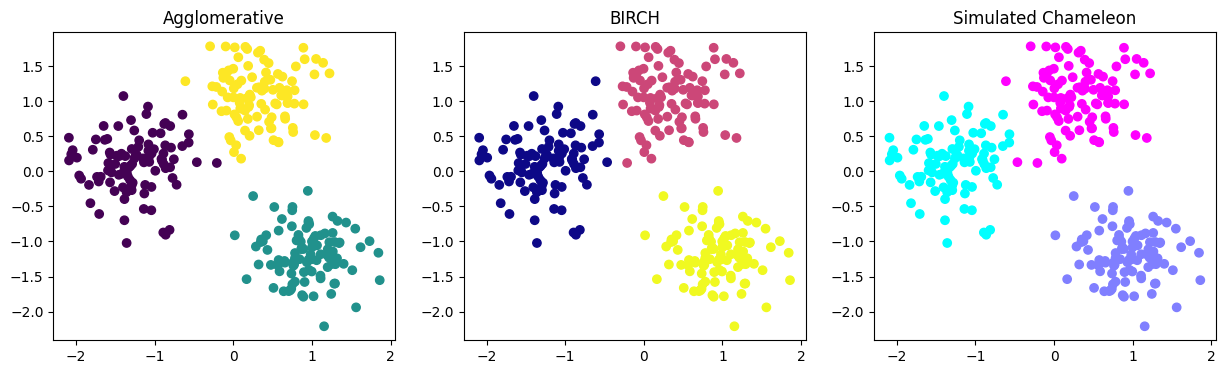

In [ ]:
# Agglomerative, BIRCH, and simulated Chameleon clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

agglo = AgglomerativeClustering(n_clusters=3)
labels_agglo = agglo.fit_predict(X_scaled)

birch = Birch(n_clusters=3)
labels_birch = birch.fit_predict(X_scaled)

chameleon_like = AgglomerativeClustering(n_clusters=3, linkage='average')
labels_chameleon = chameleon_like.fit_predict(X_scaled)

plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_agglo, cmap='viridis')
plt.title('Agglomerative')
plt.subplot(1, 3, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_birch, cmap='plasma')
plt.title('BIRCH')
plt.subplot(1, 3, 3)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_chameleon, cmap='cool')
plt.title('Simulated Chameleon')
plt.show()

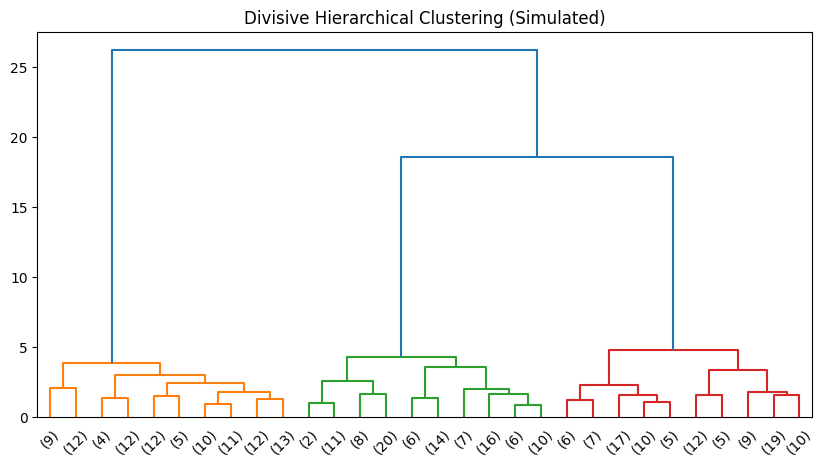

In [ ]:
# Divisive Hierarchical Clustering (using linkage)
linkage_matrix = linkage(X_scaled, method='ward')
labels_divisive = fcluster(linkage_matrix, t=3, criterion='maxclust')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30)
plt.title('Divisive Hierarchical Clustering (Simulated)')
plt.show()

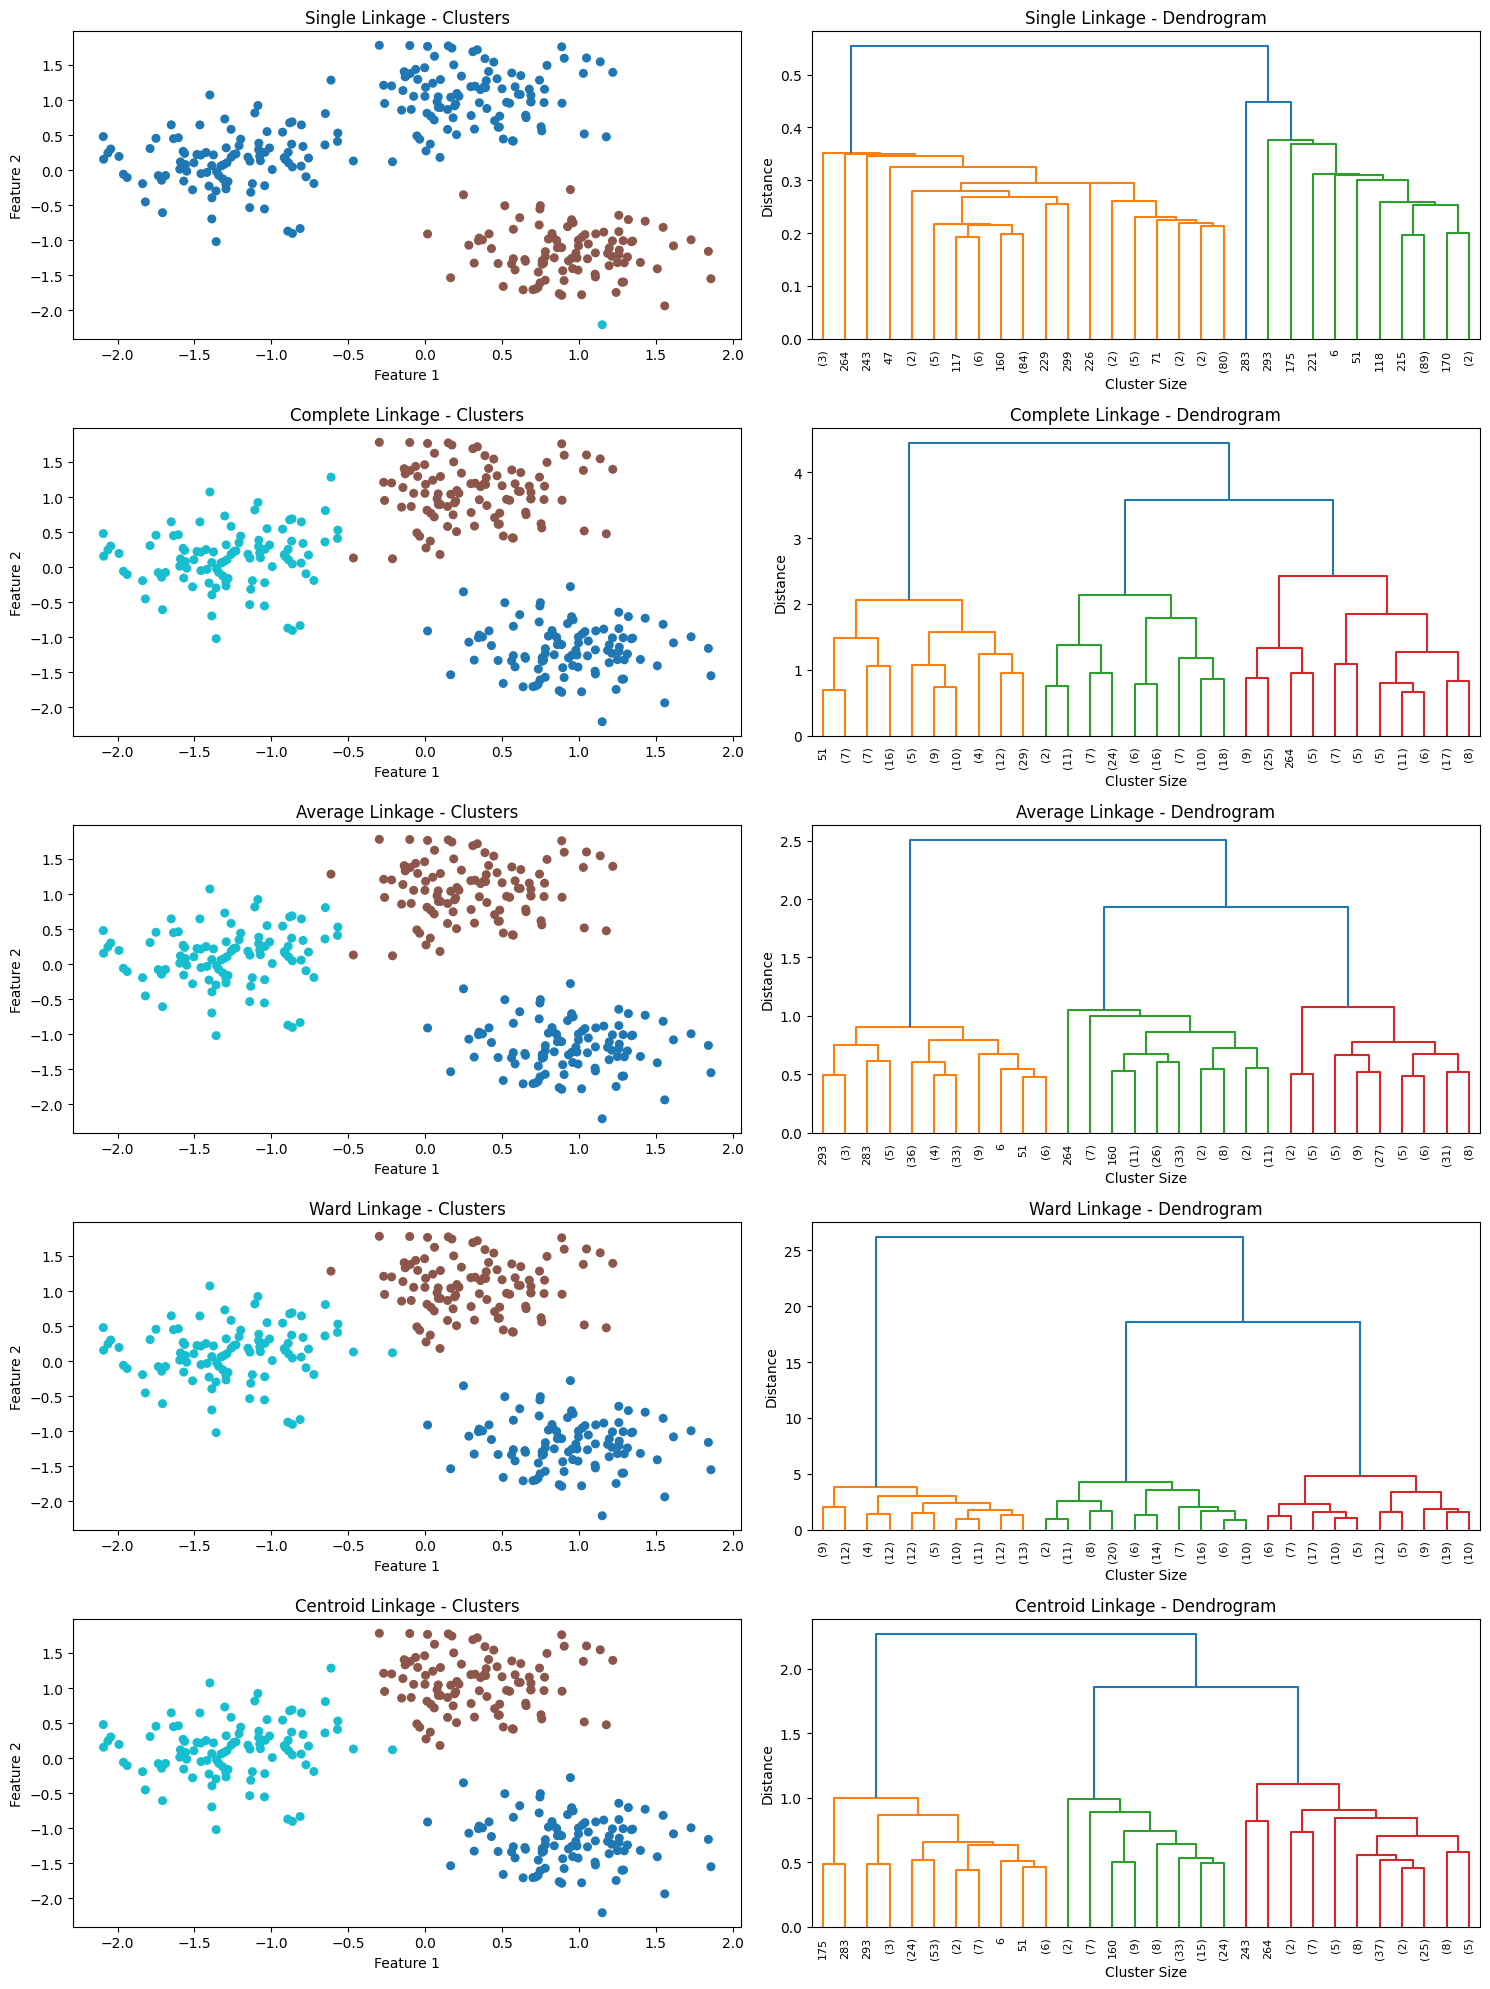

In [ ]:
linkages = ['single', 'complete', 'average', 'ward', 'centroid']

plt.figure(figsize=(15, 20))  # Larger figure for all subplots

for i, linkage_method in enumerate(linkages):
    # Generate linkage matrix
    linkage_matrix = sch.linkage(X_scaled, method=linkage_method)

    # Get cluster labels (3 clusters)
    labels = fcluster(linkage_matrix, t=3, criterion='maxclust')

    # ----------------- Scatter Plot ----------------
    plt.subplot(len(linkages), 2, 2*i + 1)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='tab10', s=30)
    plt.title(f"{linkage_method.capitalize()} Linkage - Clusters")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

    # ----------------- Dendrogram ----------------
    plt.subplot(len(linkages), 2, 2*i + 2)
    sch.dendrogram(linkage_matrix, truncate_mode='lastp', p=30,
                   leaf_rotation=90, leaf_font_size=8)
    plt.title(f"{linkage_method.capitalize()} Linkage - Dendrogram")
    plt.xlabel("Cluster Size")
    plt.ylabel("Distance")

plt.tight_layout()
plt.show()


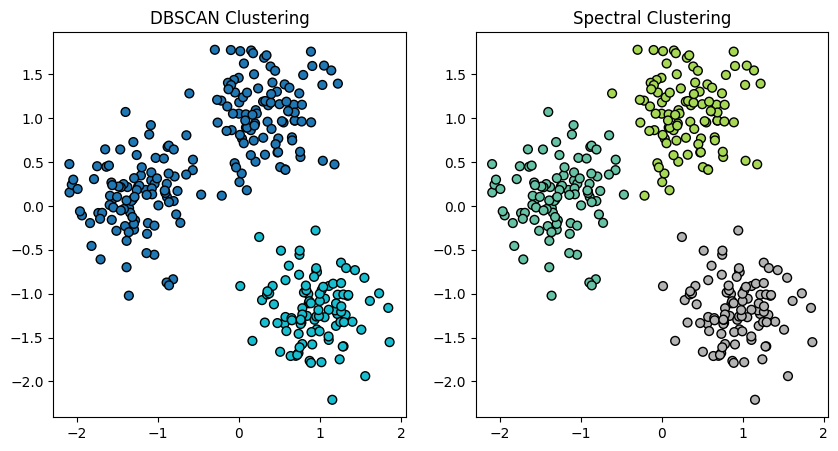

In [ ]:
# DBSCAN and Spectral Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)
labels_spectral = spectral.fit_predict(X_scaled)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_dbscan, cmap='tab10', s=40, edgecolor='k')
plt.title('DBSCAN Clustering')
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_spectral, cmap='Set2', s=40, edgecolor='k')
plt.title('Spectral Clustering')
plt.show()